Below is the code I used to generate images for Week 4 of my GMT course. The figures appear in the videos I made on Venetian Blinds (https://youtu.be/axd0e6qgR6o). The last figure illustrates an example shown in Chapter 18 of Mattila's *Geometry of Sets and Measures in Euclidean Space*  on how to construct a Kakeya set as the dual set of a Cantor Set (which I also use as the logo for the course webpage). 

This code doesn't use my GMT module, however I've been developing some classes to represent lines and segments in hopes to make generating such illustrations more readable, so I may update this code in the future, but for now I make it available here in case anyone is interested in using it for their own purposes. (I don't add much comment below, but do see the youtube video above to see what these figures are about.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib.patches import Circle, Rectangle, Polygon

In [18]:
#Geometric transformations

class projection:
    def __init__(self,angle,translate):
        
        self.perp = np.array([[-np.sin(angle), np.cos(angle)]])
        self.translate = translate
        
    def __call__(self,x):
        x=x.reshape(-1,2)
        return x @ (self.perp.T @ self.perp)  + self.translate
    
class rotation:
    def __init__(self,a):
        self.R = np.array([[np.cos(a), -np.sin(a)],[np.sin(a),np.cos(a)]])
             
    def __call__(self,x):
        return x @ self.R.T

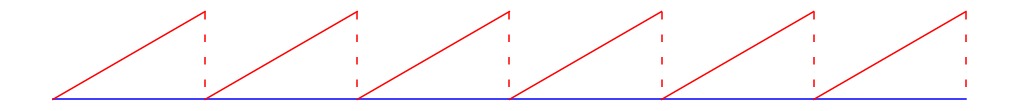

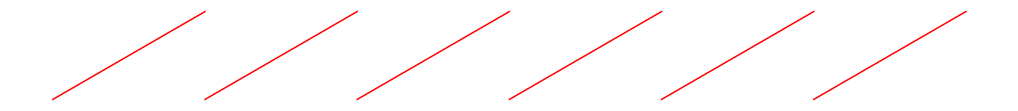

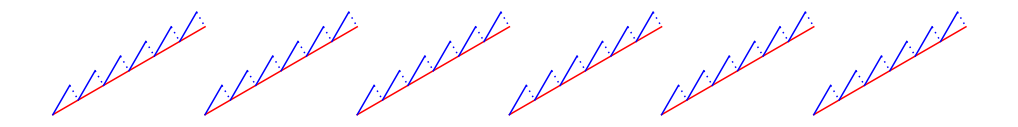

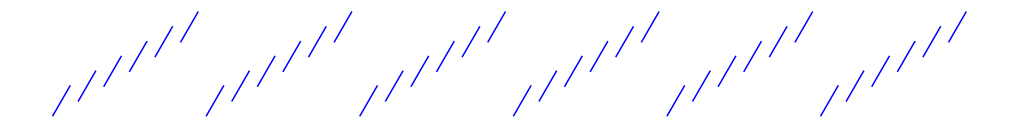

In [120]:


             

fig, ax = plt.subplots( figsize = (18,3))
ax.set_aspect("equal")
ax.axis("off")

ax.plot([0,1],[0,0],c="b")

m=6

alpha = np.pi/6
             
rotate = rotation(alpha)

interval = np.array([[0,0],[1,0]])

base_triangle = np.array([[0,0],
                          [1,np.tan(alpha)],
                         [1,0]])

intervals = np.array([base_triangle/m + np.array([[j/m,0]]) for j in range(m)])


for interval in intervals:
    ax.plot(interval[:2,0],interval[:2,1], color="red")
    
    ax.plot(interval[1:,0],interval[1:,1], "r--", dashes=(5, 10))
    
second_intervals  = np.concatenate([rotate(intervals)/(np.cos(alpha)*m) + np.array([[j/m,0]]) for j in range(m)])


fig, ax = plt.subplots( figsize = (18,3))
ax.set_aspect("equal")
ax.axis("off")

for interval in intervals:
    ax.plot(interval[:2,0],interval[:2,1], color="red")

    

fig, ax = plt.subplots(figsize = (18,3))


for interval in intervals:
    ax.plot(interval[:2,0],interval[:2,1], color="red")
    

for interval in second_intervals:
    ax.plot(interval[:2,0],interval[:2,1], color="blue")
    
    ax.plot(interval[1:,0],interval[1:,1], "b--", dashes=(1, 3))


    
ax.set_aspect("equal")
ax.axis("off")


fig, ax = plt.subplots( figsize = (18,3))
ax.set_aspect("equal")
ax.axis("off")

for interval in second_intervals:
    ax.plot(interval[:2,0],interval[:2,1], color="blue")




Text(-0.05, 0.55, '$\\theta$')

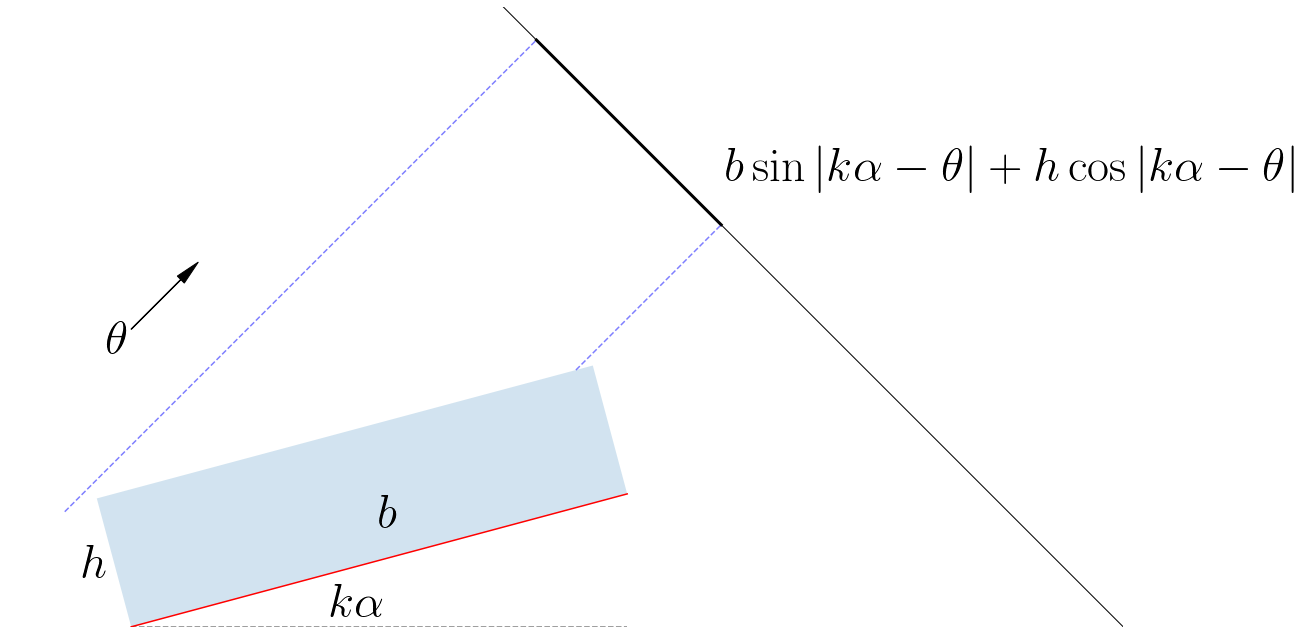

In [13]:


mpl.rcParams['text.usetex'] = True


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 48}

mpl.rc('font', **font)
    
proj = projection(np.pi/4, np.array([1,1]))

rot = rotation(alpha)

fig, ax = plt.subplots(figsize=(20,20))

ax.plot([0,1], [0,0], "k--", alpha = .5, )

alpha = np.pi/12
base_triangle = np.array([[0,0],
                          [1,np.tan(alpha)],
                         [1/np.cos(alpha),0]])

rectangle_corners = rot(np.array([[0,np.tan(alpha)],[1/np.cos(alpha),0]]))




projection_line = proj(np.array([[-10,0], [10,0]]))

ax.plot(proj(rectangle_corners)[:,0],proj(rectangle_corners)[:,1], linewidth=3, color="black")
ax.plot(projection_line[:,0],projection_line[:,1], linewidth=1, color="black")


for corner in rectangle_corners:
    dotted_line = np.concatenate([corner.reshape(1,2),proj(corner)])
    ax.plot(dotted_line[:,0], dotted_line[:,1], "b--", alpha = .5)

ax.plot(base_triangle[:2,0],base_triangle[:2,1], "r-")

#ax.plot(base_triangle[1:,0],base_triangle[1:,1], "r--")


r=Rectangle([0,0], 1/np.cos(alpha), np.tan(alpha), alpha=.2)


t = mpl.transforms.Affine2D().rotate(alpha) + ax.transData
r.set_transform(t)

vecs = np.array([[1,0], [0,0]])

ax.plot()

ax.plot()
ax.add_patch(r)
ax.set_aspect("equal")
ax.set_xlim([-.25,2])
ax.set_ylim([0,1.25])
ax.axis("off")
ax.text(1.2,1,r"$\displaystyle $")
ax.text(.5,.2,r"$b$")
ax.text(-.1,.1,r"$h$")
ax.text(.40,.02,r"$k\alpha$")
ax.text(1.2,.9,r"$b\sin |k\alpha-\theta| + h\cos|k\alpha-\theta|$")
ax.arrow(0,.6,.1,.1,head_width=0.02, head_length=0.05, color="black")
ax.text(-.05,.55,r"$\theta$")

(-1.0, 1.0, -1.0, 1.0)

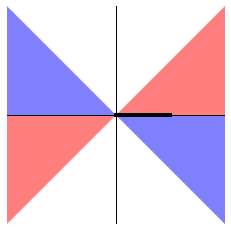

In [107]:
def radial(r,t):
    return r*np.array([np.cos(t),np.sin(t)])


wedge = lambda t: radial(10,t)
def radial_plot(s,t,ax, **kwargs):
    ax.add_patch(Polygon([[0,0],wedge(s),wedge(t)],**kwargs))
    ax.add_patch(Polygon([[0,0],wedge(np.pi + s),wedge(np.pi + t)],**kwargs))
    return ax

fig,ax = plt.subplots()
ax.set_xlim([-1,1])

ax.set_ylim([-1,1])


ax.set_aspect("equal")

radial_plot(0,np.pi/4,ax, facecolor="red", alpha=.5)   


radial_plot(-np.pi/4,0,ax, facecolor="blue", alpha=.5)   



ax.plot([0,.5],[0,0], c="k", linewidth=4)

ax.plot([1,-1],[0,0], c="k", linewidth=1)
ax.plot([0,0],[1,-1], c="k", linewidth=1)
ax.axis("off")


(-1.0, 1.0, -1.0, 1.0)

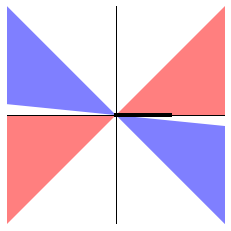

In [106]:
def radial(r,t):
    return r*np.array([np.cos(t),np.sin(t)])


wedge = lambda t: radial(10,t)
def radial_plot(s,t,ax, **kwargs):
    ax.add_patch(Polygon([[0,0],wedge(s),wedge(t)],**kwargs))
    ax.add_patch(Polygon([[0,0],wedge(np.pi + s),wedge(np.pi + t)],**kwargs))
    return ax

fig,ax = plt.subplots()
ax.set_xlim([-1,1])

ax.set_ylim([-1,1])

ax.set_aspect("equal")


radial_plot(0,np.pi/4,ax, facecolor="red", alpha=.5)   


radial_plot(-np.pi/4,-.1,ax, facecolor="blue", alpha=.5)   



ax.plot([0,.5],[0,0], c="k", linewidth=4)

ax.plot([1,-1],[0,0], c="k", linewidth=1)
ax.plot([0,0],[1,-1], c="k", linewidth=1)
ax.axis("off")


[]

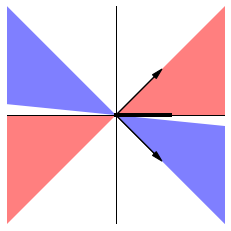

In [105]:
fig,ax = plt.subplots()
ax.set_xlim([-1,1])

ax.set_ylim([-1,1])

ax.set_aspect("equal")

radial_plot(0,np.pi/4,ax, facecolor="red", alpha=.5)   


radial_plot(-np.pi/4,-.1,ax, facecolor="blue", alpha=.5)   





ax.plot([1,-1],[0,0], c="k", linewidth=1)
ax.plot([0,0],[1,-1], c="k", linewidth=1)
ax.axis("off")

alpha = .1

delta = .1

v_1 = .5* radial(1,np.pi/4)
v_2 = .5* radial(1,-np.pi/4)
ax.plot([0,.5],[0,0], c="k", linewidth=4)
ax.arrow(0,.0,v_1[0],v_1[1],head_width=0.05, head_length=0.1, color="black")
ax.arrow(0,.0,v_2[0],v_2[1],head_width=0.05, head_length=0.1, color="black")

ax.plot()

[]

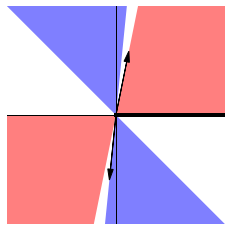

In [96]:
fig,ax = plt.subplots()
ax.set_xlim([-1,1])

ax.set_ylim([-1,1])

ax.axis("off")
ax.set_aspect("equal")

radial_plot(0,np.pi/2-alpha-delta,ax, facecolor="red", alpha=.5)   



radial_plot(-np.pi/4,-np.pi/2-.1,ax, facecolor="blue", alpha=.5)   


alpha = .1

delta = .1

v_1 = .5* radial(1,np.pi/2-alpha-delta)
v_2 = .5* radial(1,-np.pi/2-alpha)
ax.plot([0,.5],[0,0], c="k", linewidth=4)

ax.plot([1,-1],[0,0], c="k", linewidth=1)
ax.plot([0,0],[1,-1], c="k", linewidth=1)

ax.arrow(0,.0,v_1[0],v_1[1],head_width=0.05, head_length=0.1, color="black")
ax.arrow(0,.0,v_2[0],v_2[1],head_width=0.05, head_length=0.1, color="black")

ax.plot()

[]

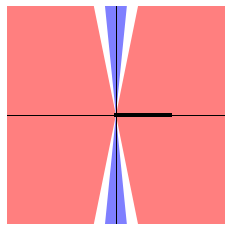

In [104]:
fig,ax = plt.subplots()
ax.set_xlim([-1,1])

ax.set_ylim([-1,1])

ax.axis("off")

ax.set_aspect("equal")
radial_plot(0,np.pi/2-alpha-delta,ax, facecolor="red", alpha=.5)   

radial_plot(0,-np.pi/2+alpha+delta,ax, facecolor="red", alpha=.5)   

radial_plot(-np.pi/2+.1,-np.pi/2-.1,ax, facecolor="blue", alpha=.5)   




alpha = .1

delta = .1

v_1 = .5* radial(1,np.pi/2-alpha-delta)
v_2 = .5* radial(1,-np.pi/2-alpha)
ax.plot([0,.5],[0,0], c="k", linewidth=4)

ax.plot([1,-1],[0,0], c="k", linewidth=1)
ax.plot([0,0],[1,-1], c="k", linewidth=1)


ax.plot()

In [125]:
class get_contractions:
    def __init__(self,centers, factors, angles = None):
        if angles == None:
            self.angles  = [0 for _ in centers]
        else:
            self.angles = angles
        if type(factors) in [int,float]:
            self.factors = [factors for _ in centers]
        else:
            self.factors = factors


        self.similarities = [r*np.array([[np.cos(a), -np.sin(a)],
                                      [np.sin(a),np.cos(a)]])
                             for (r,a) in zip(self.factors, self.angles)]
        
        
        
        self.centers = [np.array(c).reshape(1,-1) for c in centers]
        
        
    
    def __iter__(self):
        
        for c, s in zip(self.centers,self.similarities):
            yield lambda x: x @ s.T+c
            
def get_points(contractions,n):
    points = np.zeros((1,2))
    for _ in range(n):
        points = np.concatenate([f(points) for f in contractions])
    return np.array(points)


def plot_fractal(centers,factors,n, angles=None):
    contractions = get_contractions(centers, factors, angles)
    points = get_points(contractions,n)
    fig, ax =plt.subplots(figsize = (10,10))
    ax.scatter(points[:,0], points[:,1], s=2**(-n+2), color="black")
    ax.set_aspect("equal")
    ax.axis("off")
    plt.show()

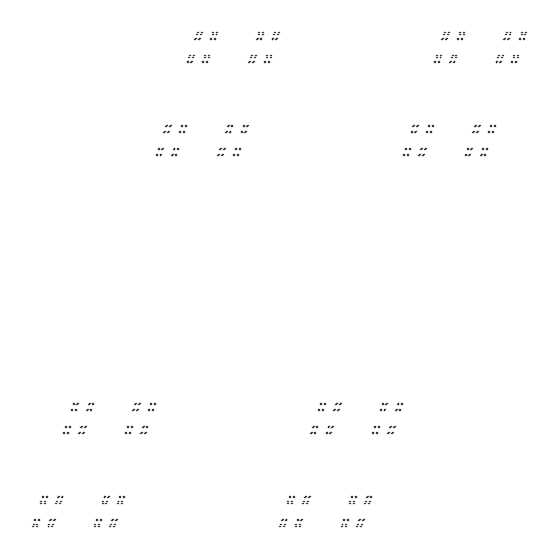

In [127]:
cantor = [[0,0], [1/4,3/4],[1/2,0],[3/4,3/4]]
plot_fractal(centers=cantor,factors=1/4,n=5)


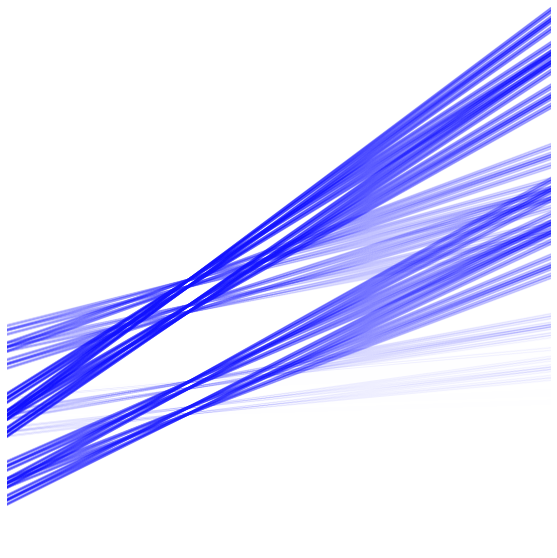

In [130]:


def plot_dual(points):
    fig, ax =plt.subplots(figsize = (10,10))

    
    for point in points:
        a,b = point
        #line = rotation(-np.pi/7)(np.array([[-2,-a+b],[2,2*a+b]]))
        line = np.array([[-2,-a+b],[2,2*a+b]])
        ax.plot(line[:,0], line[:,1], alpha=a/20, color = "blue")
        
    ax.set_xlim([-2,2])
    ax.set_ylim([-1,3])
    ax.set_aspect("equal")
    ax.axis("off")
    plt.show()
    


def plot_fractal_dual(centers,factors,n, angles=None):
    contractions = get_contractions(centers, factors, angles)
    points = get_points(contractions,n)
    plot_dual(points)
    
    
cantor = [[0,0], [1/4,3/4],[1/2,0],[3/4,3/4]]
plot_fractal_dual(centers=cantor,factors=1/4,n=6)